In [1]:
using Random
Random.seed!(4649373)

TaskLocalRNG()

In [2]:
using Distributions
using QuadGK
using Roots

function winningrate(
        distx::ContinuousUnivariateDistribution,
        disty::ContinuousUnivariateDistribution
    )
    quadgk(y -> cdf(distx, y)*pdf(disty, y), extrema(disty)...)[1]
end

function tieshift(
        distx::ContinuousUnivariateDistribution,
        disty::ContinuousUnivariateDistribution;
        p = 0.5
    )
    find_zero(0.0) do a
        winningrate(distx + a, disty) - p
    end
end

@show distx = Exponential(1)
@show disty = Exponential(1.1)
@show distx = distx - mean(distx)
@show disty = disty - mean(disty)
@show winningrate(distx, disty)
@show a = tieshift(distx, disty)
@show winningrate(distx + a, disty);9

distx = Exponential(1) = Exponential{Float64}(θ=1.0)
disty = Exponential(1.1) = Exponential{Float64}(θ=1.1)
distx = distx - mean(distx) = LocationScale{Float64, Continuous, Exponential{Float64}}(
μ: -1.0
σ: 1.0
ρ: Exponential{Float64}(θ=1.0)
)

disty = disty - mean(disty) = LocationScale{Float64, Continuous, Exponential{Float64}}(
μ: -1.1
σ: 1.0
ρ: Exponential{Float64}(θ=1.1)
)

winningrate(distx, disty) = 0.47829085338031047
a = tieshift(distx, disty) = -0.04882798316870562
winningrate(distx + a, disty) = 0.49999999999999994


9

In [3]:
@show distx = Exponential(1)
@show disty = Exponential(1.1)
@show distx = distx - median(distx)
@show disty = disty - median(disty)
@show winningrate(distx, disty)
@show a = tieshift(distx, disty)
@show winningrate(distx + a, disty);

distx = Exponential(1) = Exponential{Float64}(θ=1.0)
disty = Exponential(1.1) = Exponential{Float64}(θ=1.1)
distx = distx - median(distx) = LocationScale{Float64, Continuous, Exponential{Float64}}(
μ: -0.6931471805599453
σ: 1.0
ρ: Exponential{Float64}(θ=1.0)
)

disty = disty - median(disty) = LocationScale{Float64, Continuous, Exponential{Float64}}(
μ: -0.7624618986159398
σ: 1.0
ρ: Exponential{Float64}(θ=1.1)
)

winningrate(distx, disty) = 0.491820953163202
a = tieshift(distx, disty) = -0.01814270122470007
winningrate(distx + a, disty) = 0.5


In [4]:
@show distx = LogNormal()
@show disty = 1.1LogNormal()
@show distx = distx - mean(distx)
@show disty = disty - mean(disty)
@show winningrate(distx, disty)
@show a = tieshift(distx, disty)
@show winningrate(distx + a, disty);

distx = LogNormal() = LogNormal{Float64}(μ=0.0, σ=1.0)
disty = 1.1 * LogNormal() = LocationScale{Float64, Continuous, LogNormal{Float64}}(
μ: 0.0
σ: 1.1
ρ: LogNormal{Float64}(μ=0.0, σ=1.0)
)

distx = distx - mean(distx) = LocationScale{Float64, Continuous, LogNormal{Float64}}(
μ: -1.6487212707001282
σ: 1.0
ρ: LogNormal{Float64}(μ=0.0, σ=1.0)
)

disty = disty - mean(disty) = LocationScale{Float64, Continuous, LogNormal{Float64}}(
μ: -1.813593397770141
σ: 1.1
ρ: LogNormal{Float64}(μ=0.0, σ=1.0)
)

winningrate(distx, disty) = 0.47076014690097634
a = tieshift(distx, disty) = -0.08680884653722044
winningrate(distx + a, disty) = 0.5


In [5]:
@show distx = Exponential(1)
@show disty = Exponential(1.1)
@show distx = distx - median(distx)
@show disty = disty - median(disty)
@show winningrate(distx, disty)
@show a = tieshift(distx, disty)
@show winningrate(distx + a, disty);

distx = Exponential(1) = Exponential{Float64}(θ=1.0)
disty = Exponential(1.1) = Exponential{Float64}(θ=1.1)
distx = distx - median(distx) = LocationScale{Float64, Continuous, Exponential{Float64}}(
μ: -0.6931471805599453
σ: 1.0
ρ: Exponential{Float64}(θ=1.0)
)

disty = disty - median(disty) = LocationScale{Float64, Continuous, Exponential{Float64}}(
μ: -0.7624618986159398
σ: 1.0
ρ: Exponential{Float64}(θ=1.1)
)

winningrate(distx, disty) = 0.491820953163202
a = tieshift(distx, disty) = -0.01814270122470007
winningrate(distx + a, disty) = 0.5


In [6]:
c(x...) = [x...]

@show sigma1 = c(1, 2, 3, 4, 4, 4, 4)
@show sigma2 = c(4, 4, 4, 4, 3, 2, 1)
@show sigmas1 = @. sqrt(log((1 + sqrt((4 * sigma1^2)/25 + 1))/2))
@show sigmas2 = @. sqrt(log((1 + sqrt((4 * sigma2^2)/25 + 1))/2))
@show mu1 = log(5)
@show mu2 = log(5)
@show lognormals1 = LogNormal.(mu1, sigmas1)
@show lognormals2 = LogNormal.(mu2, sigmas2)
@show median.(lognormals1)
@show median.(lognormals2)
@show winningrate.(lognormals1, lognormals2)
@show tieshift.(lognormals1, lognormals2);

sigma1 = c(1, 2, 3, 4, 4, 4, 4) = [1, 2, 3, 4, 4, 4, 4]
sigma2 = c(4, 4, 4, 4, 3, 2, 1) = [4, 4, 4, 4, 3, 2, 1]
sigmas1 = #= In[6]:5 =# @__dot__(sqrt(log((1 + sqrt((4 * sigma1 ^ 2) / 25 + 1)) / 2))) = [0.19440481973705104, 0.36235656579549336, 0.4976550144706184, 0.6058053602170826, 0.6058053602170826, 0.6058053602170826, 0.6058053602170826]
sigmas2 = #= In[6]:6 =# @__dot__(sqrt(log((1 + sqrt((4 * sigma2 ^ 2) / 25 + 1)) / 2))) = [0.6058053602170826, 0.6058053602170826, 0.6058053602170826, 0.6058053602170826, 0.4976550144706184, 0.36235656579549336, 0.19440481973705104]
mu1 = log(5) = 1.6094379124341003
mu2 = log(5) = 1.6094379124341003
lognormals1 = LogNormal.(mu1, sigmas1) = LogNormal{Float64}[LogNormal{Float64}(μ=1.6094379124341003, σ=0.19440481973705104), LogNormal{Float64}(μ=1.6094379124341003, σ=0.36235656579549336), LogNormal{Float64}(μ=1.6094379124341003, σ=0.4976550144706184), LogNormal{Float64}(μ=1.6094379124341003, σ=0.6058053602170826), LogNormal{Float64}(μ=1.609437912434100

In [7]:
using Distributions

safediv(x, y) = x == 0 ? x : isinf(y) ? zero(y) : x/y

"""
    h_brunner_munzel(x, y)

この函数は, x < y のとき 1.0 を, x = y のとき 0.5 を, それら以外のとき 0.0 返す.
"""
h_brunner_munzel(x, y) = (x < y) + (x == y)/2

@doc raw"""
    brunner_munzel_test(X, Y; p = 1/2)

この函数は数値のベクトルのデータ `X`, `Y` について, Brunner-Munzel検定関係の統計量達を計算する. 詳細は以下の通り.

函数 $H(x, y)$ と $\hat{p}$, $H^x_i$, $H^y_j$, $\bar{H}^x$, $\bar{H}^y$ を次のように定める:

```math
\begin{aligned}
&
m = \mathrm{length}(X), \quad
n = \mathrm{length}(Y), \quad
x_i = X[i], \quad
y_j = Y[j],
\\ &
\hat{p} = \frac{1}{mn}\sum_{i=1}^m \sum_{j=1}^n H(x_i, y_j),
\\ &
H(x, y) = \begin{cases} 1 & (x < y) \\ 1/2 & (x = y) \\ 0 & (x > y), \end{cases}
\\ &
H^x_i = \sum_{j=1}^n H(y_j, x_i), \quad
H^y_j = \sum_{i=1}^m H(x_i, y_j),
\\ &
\bar{H}^x = \frac{1}{m} \sum_{i=1}^m H^x_i = n - n\hat{p},
\\ &
\bar{H}^y = \frac{1}{n} \sum_{j=1}^n H^y_j = m\hat{p}.
\end{aligned}
```

この函数は以下達の named tuple で返す:

```math
\begin{aligned}
&
\mathrm{phat} = 
\hat{p} = \frac{\bar{H}^y - \bar{H}^x + n}{m + n},
\\ &
\mathrm{sx2} =
\hat{\sigma}_x^2 = \frac{1}{n^2}\frac{1}{m-1}\sum_{i=1}^m (H^x_i - \bar{H}^x)^2,
\\ &
\mathrm{sy2} =
\hat{\sigma}_y^2 = \frac{1}{m^2}\frac{1}{n-1}\sum_{j=1}^n (H^y_j - \bar{H}^y)^2,
\\ &
\mathrm{sehat} = 
\widehat{\mathrm{se}} = \sqrt{\frac{\hat{\sigma}_x^2}{m} + \frac{\hat{\sigma}_y^2}{n}}, 
\\ &
\mathrm{tvalue} = t = \frac{\hat{p} - p}{\widehat{\mathrm{se}}},
\\ &
\mathrm{df} =
\nu = 
\frac
{\left(\hat{\sigma}_x^2/m + \hat{\sigma}_y^2/n\right)^2}
{
\dfrac{\left(\hat{\sigma}_x^2/m\right)^2}{m-1} +
\dfrac{\left(\hat{\sigma}_y^2/n\right)^2}{n-1}
},
\\ &
\mathrm{pvalue} =
2\mathrm{ccdf}(\mathrm{TDist}(\nu), |t|),
\\ &
\mathrm{p} = p.
\end{aligned}
```
"""
function brunner_munzel_test(X, Y; p=1/2)
    m, n = length(X), length(Y)
    phat = mean(h_brunner_munzel(x, y) for x in X, y in Y)
    Hbarx = n*(1 - phat)
    Hbary = m*phat
    sx2 = 1/n^2 * 1/(m-1) * sum(x -> (sum(h_brunner_munzel(y, x) for y in Y) - Hbarx)^2, X)
    sy2 = 1/m^2 * 1/(n-1) * sum(y -> (sum(h_brunner_munzel(x, y) for x in X) - Hbary)^2, Y)
    sehat = √(sx2/m + sy2/n)
    tvalue = (phat - p)/sehat
    df = (sx2/m + sy2/n)^2 / ((sx2/m)^2/(m-1) + (sy2/n)^2/(n-1))
    pvalue = 2ccdf(TDist(df), abs(tvalue))
    (; phat, sehat, tvalue, df, pvalue, p)
end

@doc raw"""
    pvalue_brunner_munzel_test(X, Y; p = 1/2)

この函数はBrunner-Munzel検定のP値 `pvalue` を返す.
"""
pvalue_brunner_munzel_test(X, Y; p=1/2) = brunner_munzel_test(X, Y; p).pvalue

pvalue_brunner_munzel_test

In [8]:
function mann_whitney_u_test(X, Y; correct=true)
    m, n = length(X), length(Y)
    phat = mean((x < y) + (x == y)/2 for x in X, y in Y)
    sehat = √((m+n+1)/(12m*n))
    zvalue = (phat - 1/2)/sehat
    correction = correct/(2m*n*sehat)
    pvalue = 2ccdf(Normal(), max(0, abs(zvalue) - correction))
    (; phat, sehat, zvalue, pvalue)
end

pvalue_mann_whitney_u_test(X, Y; correct=true) = mann_whitney_u_test(X, Y; correct).pvalue

pvalue_mann_whitney_u_test (generic function with 1 method)

In [9]:
using HypothesisTests

X = rand(30, 20)
Y = rand(30, 20)
pval1 = [HypothesisTests.pvalue(MannWhitneyUTest(x, y)) for (x, y) in zip(eachcol(X), eachcol(Y))]
pval2 = [pvalue_mann_whitney_u_test(x, y) for (x, y) in zip(eachcol(X), eachcol(Y))]
pval3 = [pvalue_mann_whitney_u_test(x, y; correct=false) for (x, y) in zip(eachcol(X), eachcol(Y))]
[pval1 pval2 pval3 pval1-pval2 pval1-pval3]

20×5 Matrix{Float64}:
 0.652044    0.652044    0.646725     5.55112e-16  0.00531905
 0.53951     0.53951     0.534635     2.22045e-16  0.00487508
 0.195791    0.195791    0.193248     1.11022e-16  0.00254238
 0.830255    0.830255    0.824496    -1.11022e-16  0.00575953
 0.510598    0.510598    0.505859    -2.22045e-16  0.00473876
 0.0701266   0.0701266   0.0689901    9.71445e-17  0.00113645
 0.510598    0.510598    0.505859    -2.22045e-16  0.00473876
 0.970516    0.970516    0.964623     2.22045e-16  0.00589325
 0.795846    0.795846    0.790147     2.22045e-16  0.00569849
 0.211561    0.211561    0.208871     0.0          0.00269031
 0.222573    0.222573    0.219782    -5.55112e-17  0.00279064
 0.270705    0.270705    0.267503    -1.66533e-16  0.00320263
 0.610008    0.610008    0.604839    -2.22045e-16  0.0051689
 0.332855    0.332855    0.329177     1.66533e-16  0.00367727
 0.00831461  0.00831461  0.00813506   0.0          0.000179546
 0.888303    0.888303    0.882466     2.22045e-1

In [10]:
using HypothesisTests

X = rand(1000, 20)
Y = rand(1000, 20)
pval1 = [HypothesisTests.pvalue(MannWhitneyUTest(x, y)) for (x, y) in zip(eachcol(X), eachcol(Y))]
pval2 = [pvalue_mann_whitney_u_test(x, y) for (x, y) in zip(eachcol(X), eachcol(Y))]
pval3 = [pvalue_mann_whitney_u_test(x, y; correct=false) for (x, y) in zip(eachcol(X), eachcol(Y))]
[pval1 pval2 pval3 pval1-pval2 pval1-pval3]

20×5 Matrix{Float64}:
 0.604703   0.604703   0.604676   -2.22045e-16  2.702e-5
 0.61441    0.61441    0.614383    6.66134e-16  2.7212e-5
 0.11235    0.11235    0.112341   -8.32667e-17  8.75926e-6
 0.59201    0.59201    0.591983   -2.55351e-15  2.67611e-5
 0.0562795  0.0562795  0.0562745  -4.92661e-16  4.99606e-6
 0.167388   0.167388   0.167376   -4.16334e-16  1.19109e-5
 0.549456   0.549456   0.549431    6.66134e-16  2.58268e-5
 0.9697     0.9697     0.969669    1.22125e-15  3.08719e-5
 0.80929    0.80929    0.809259   -1.22125e-15  3.00073e-5
 0.510457   0.510457   0.510432   -9.99201e-16  2.48782e-5
 0.843912   0.843912   0.843882   -2.33147e-15  3.0301e-5
 0.390636   0.390636   0.390615    1.60982e-15  2.13718e-5
 0.790204   0.790204   0.790174   -3.33067e-16  2.98198e-5
 0.491295   0.491295   0.491271    2.77556e-16  2.43787e-5
 0.966675   0.966675   0.966644   -8.88178e-16  3.08672e-5
 0.932146   0.932146   0.932115   -5.55112e-16  3.07824e-5
 0.0617762  0.0617762  0.0617708  -5.8

In [11]:
X = rand(100)
Y = rand(100)
@time @show brunner_munzel_test(X, Y)
@time @show mann_whitney_u_test(X, Y);

brunner_munzel_test(X, Y) = (phat = 0.4877, sehat = 0.04117165593615652, tvalue = -0.29874921764315643, df = 197.9099321253469, pvalue = 0.7654448527620511, p = 0.5)
  0.845855 seconds (1.01 M allocations: 66.787 MiB, 1.26% gc time, 99.96% compilation time)
mann_whitney_u_test(X, Y) = (phat = 0.4877, sehat = 0.04092676385936225, zvalue = -0.3005368331165103, pvalue = 0.7646996047810375)
  0.049585 seconds (64.91 k allocations: 4.397 MiB, 99.38% compilation time)


In [12]:
using HypothesisTests
ECDF(A, x) = count(≤(x), A)/length(A)
using StatsPlots
default(fmt=:png)
using Random

function plot_sim_bm_mw(;
        distx = Exponential(1),
        disty = Exponential(3),
        a = -1,
        b = 10,
        m = 100,
        n = 100,
        L = 10^6,
        shifttype = :median,
        α = 0.05,
        legend = :bottomright,
    )
    @show distx
    @show disty
    @show tiesh = tieshift(distx, disty)
    @show mediansh = median(disty) - median(distx)
    @show meansh = mean(disty) - mean(distx)
    println()
    @show shifttype
    if shifttype == :tie
        @show distx = distx + tiesh
    elseif shifttype == :median
        @show distx = distx + mediansh
    elseif shifttype == :mean
        @show distx = distx + meansh
    end
    @show winningrate(distx, disty)
    @show median(distx) median(disty)
    @show mean(distx) mean(disty)

    P1 = plot(distx, a, b; label="distx")
    plot!(disty, a, b; label="disty", ls=:dash)

    @show m
    @show n
    println()

    pval_bm = zeros(L)
    pval_mw = zeros(L)

    nth = Threads.nthreads()
    Xtmp = [zeros(m) for _ in 1:nth]
    Ytmp = [zeros(n) for _ in 1:nth]
    
    @time Threads.@threads for i in 1:L
        tid = Threads.threadid()
        X = rand!(distx, Xtmp[tid])
        Y = rand!(disty, Ytmp[tid])
        pval_bm[i] = pvalue_brunner_munzel_test(X, Y)
        pval_mw[i] = pvalue_mann_whitney_u_test(X, Y)
    end

    @show α
    @show ECDF(pval_bm, α)
    @show ECDF(pval_mw, α)

    _tick = [0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]
    xtick = ytick = (_tick, string.(_tick))

    αs = exp.(range(log(0.002), log(1), 1000))
    P2 = plot(αs, α -> ECDF(pval_bm, α); label="Brunner-Munzel test")
    plot!(αs, α -> ECDF(pval_mw, α); label="Mann-Whitney U-test", ls=:dash)
    plot!(αs, identity; label="", ls=:dot, c=:gray)
    plot!(αs, x->0.8x; label="", ls=:dot, c=:gray)
    plot!(αs, x->1.2x; label="", ls=:dot, c=:gray)
    plot!(; xscale=:log10, yscale=:log10, xtick, ytick)
    plot!(; legend)
    
    plot(P1, P2; size=(400, 570), layout=@layout [a{0.3h}; b])
    plot!(leftmargin=4Plots.mm)
end

plot_sim_bm_mw (generic function with 1 method)

distx = Exponential{Float64}(θ=1.0)
disty = Exponential{Float64}(θ=3.0)
tiesh = tieshift(distx, disty) = 1.2163953243549488
mediansh = median(disty) - median(distx) = 1.3862943611198904
meansh = mean(disty) - mean(distx) = 2.0

shifttype = :tie
distx = distx + tiesh = LocationScale{Float64, Continuous, Exponential{Float64}}(
μ: 1.2163953243549488
σ: 1.0
ρ: Exponential{Float64}(θ=1.0)
)

winningrate(distx, disty) = 0.5
median(distx) = 1.909542504914894
median(disty) = 2.0794415416798357
mean(distx) = 2.2163953243549486
mean(disty) = 3.0
m = 100
n = 100

  6.079052 seconds (4.87 M allocations: 261.428 MiB, 0.67% gc time, 30.67% compilation time)
α = 0.05
ECDF(pval_bm, α) = 0.050721
ECDF(pval_mw, α) = 0.070232


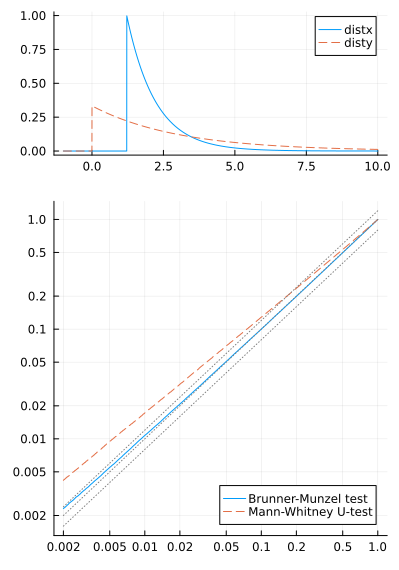

In [13]:
plot_sim_bm_mw(; m=100, n=100, shifttype=:tie)

distx = Exponential{Float64}(θ=1.0)
disty = Exponential{Float64}(θ=3.0)
tiesh = tieshift(distx, disty) = 1.2163953243549488
mediansh = median(disty) - median(distx) = 1.3862943611198904
meansh = mean(disty) - mean(distx) = 2.0

shifttype = :median
distx = distx + mediansh = LocationScale{Float64, Continuous, Exponential{Float64}}(
μ: 1.3862943611198904
σ: 1.0
ρ: Exponential{Float64}(θ=1.0)
)

winningrate(distx, disty) = 0.47247039320177775
median(distx) = 2.0794415416798357
median(disty) = 2.0794415416798357
mean(distx) = 2.3862943611198904
mean(disty) = 3.0
m = 100
n = 100

  5.993531 seconds (4.82 M allocations: 298.177 MiB, 0.70% gc time)
α = 0.05
ECDF(pval_bm, α) = 0.095378
ECDF(pval_mw, α) = 0.125446


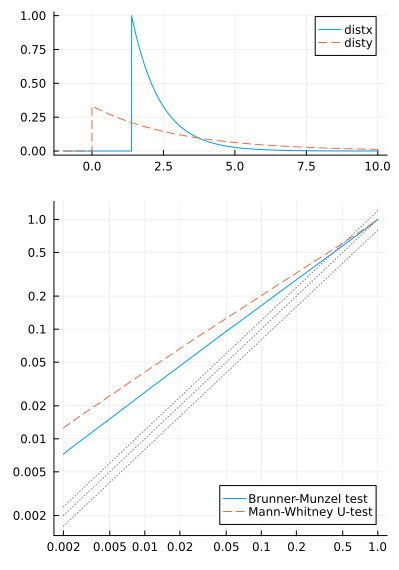

In [14]:
plot_sim_bm_mw(; m=100, n=100, shifttype=:median)

distx = Exponential{Float64}(θ=1.0)
disty = Exponential{Float64}(θ=3.0)
tiesh = tieshift(distx, disty) = 1.2163953243549488
mediansh = median(disty) - median(distx) = 1.3862943611198904
meansh = mean(disty) - mean(distx) = 2.0

shifttype = :mean
distx = distx + meansh = LocationScale{Float64, Continuous, Exponential{Float64}}(
μ: 2.0
σ: 1.0
ρ: Exponential{Float64}(θ=1.0)
)

winningrate(distx, disty) = 0.3850628403942911
median(distx) = 2.6931471805599454
median(disty) = 2.0794415416798357
mean(distx) = 3.0
mean(disty) = 3.0
m = 100
n = 100

  6.140586 seconds (5.89 M allocations: 607.894 MiB, 0.73% gc time)
α = 0.05
ECDF(pval_bm, α) = 0.728763
ECDF(pval_mw, α) = 0.786573


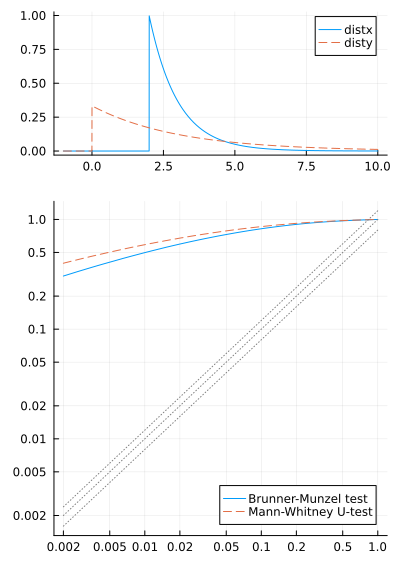

In [15]:
plot_sim_bm_mw(; m=100, n=100, shifttype=:mean)

distx = Exponential{Float64}(θ=1.0)
disty = Exponential{Float64}(θ=3.0)
tiesh = tieshift(distx, disty) = 1.2163953243549488
mediansh = median(disty) - median(distx) = 1.3862943611198904
meansh = mean(disty) - mean(distx) = 2.0

shifttype = :median
distx = distx + mediansh = LocationScale{Float64, Continuous, Exponential{Float64}}(
μ: 1.3862943611198904
σ: 1.0
ρ: Exponential{Float64}(θ=1.0)
)

winningrate(distx, disty) = 0.47247039320177775
median(distx) = 2.0794415416798357
median(disty) = 2.0794415416798357
mean(distx) = 2.3862943611198904
mean(disty) = 3.0
m = 200
n = 200

  2.298235 seconds (495.85 k allocations: 34.135 MiB)
α = 0.05
ECDF(pval_bm, α) = 0.13955
ECDF(pval_mw, α) = 0.1787


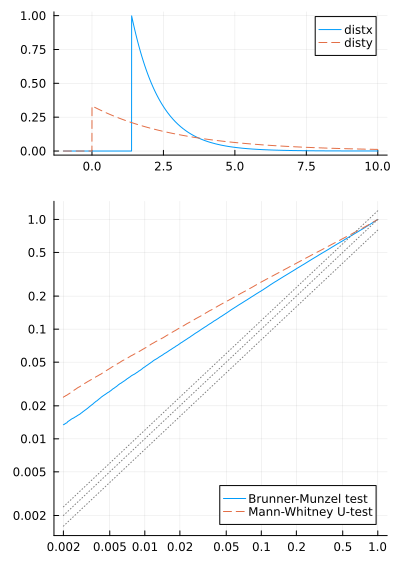

In [16]:
plot_sim_bm_mw(; m=200, n=200, shifttype=:median, L=10^5)

distx = Exponential{Float64}(θ=1.0)
disty = Exponential{Float64}(θ=3.0)
tiesh = tieshift(distx, disty) = 1.2163953243549488
mediansh = median(disty) - median(distx) = 1.3862943611198904
meansh = mean(disty) - mean(distx) = 2.0

shifttype = :median
distx = distx + mediansh = LocationScale{Float64, Continuous, Exponential{Float64}}(
μ: 1.3862943611198904
σ: 1.0
ρ: Exponential{Float64}(θ=1.0)
)

winningrate(distx, disty) = 0.47247039320177775
median(distx) = 2.0794415416798357
median(disty) = 2.0794415416798357
mean(distx) = 2.3862943611198904
mean(disty) = 3.0
m = 500
n = 500

  7.021850 seconds (265.59 k allocations: 22.310 MiB)
α = 0.05
ECDF(pval_bm, α) = 0.28222
ECDF(pval_mw, α) = 0.33782


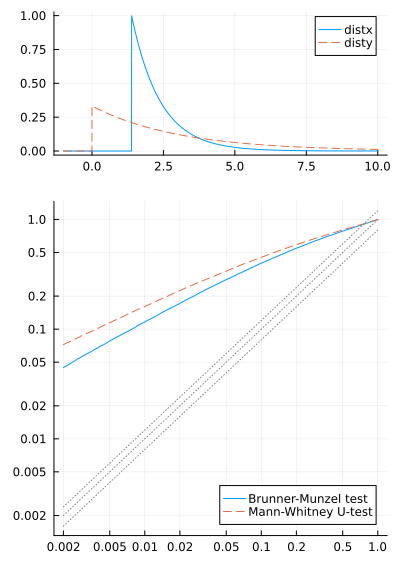

In [17]:
plot_sim_bm_mw(; m=500, n=500, shifttype=:median, L=5*10^4)

distx = Exponential{Float64}(θ=1.0)
disty = Exponential{Float64}(θ=3.0)
tiesh = tieshift(distx, disty) = 1.2163953243549488
mediansh = median(disty) - median(distx) = 1.3862943611198904
meansh = mean(disty) - mean(distx) = 2.0

shifttype = :median
distx = distx + mediansh = LocationScale{Float64, Continuous, Exponential{Float64}}(
μ: 1.3862943611198904
σ: 1.0
ρ: Exponential{Float64}(θ=1.0)
)

winningrate(distx, disty) = 0.47247039320177775
median(distx) = 2.0794415416798357
median(disty) = 2.0794415416798357
mean(distx) = 2.3862943611198904
mean(disty) = 3.0
m = 1000
n = 1000

  5.599793 seconds (55.86 k allocations: 5.452 MiB)
α = 0.05
ECDF(pval_bm, α) = 0.5084
ECDF(pval_mw, α) = 0.5693


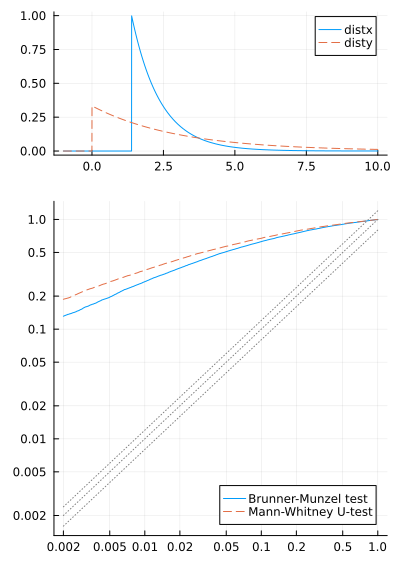

In [18]:
plot_sim_bm_mw(; m=1000, n=1000, shifttype=:median, L=10^4)